# Background manipulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [10]:
# reading the image
read = cv2.imread('images/pizza_bluescreen.jpg')

# get to know the type of the image and its dimensions
print('Type of the image :', type(read), 'Dimension of the image :', read.shape)

Type of the image : <class 'numpy.ndarray'> Dimension of the image : (514, 816, 3)


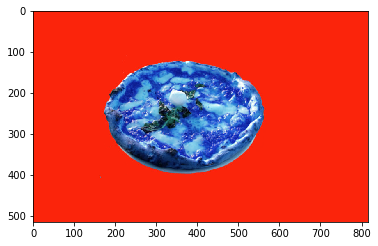

In [11]:
plt.imshow(read)

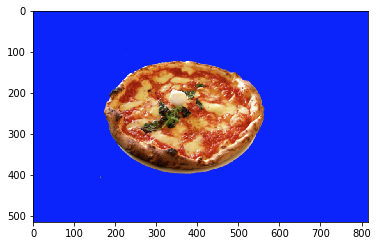

In [37]:
# so lets convert it from BGR to RGB

image_copy = np.copy(read)

read = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
plt.imshow(read)

# Define the colour threshold

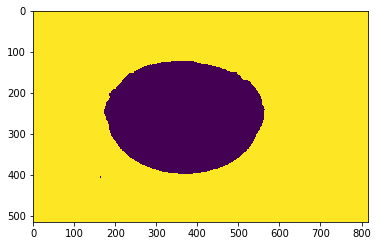

In [20]:
# define the colour boundaries. 
lower_blue = np.array([0, 0, 220])
upper_blue = np.array([50, 70, 255])

# any colour between this range will be blue. Create a mask
mask = cv2.inRange(read, lower_blue, upper_blue) # if the pixels fall under this range the mask will allow it to be displayed.
# or else it will block it out and turn the pixel black. 
plt.imshow(mask)

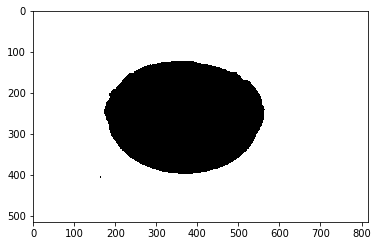

In [21]:
plt.imshow(mask, cmap = 'gray')

In [22]:
# now we have to let the pizza show through.
masked_image = np.copy(read)
# now one way to do this is to select the area of the image where the mask is not equal to zero.
masked_image[mask != 0] = [0, 0, 0]

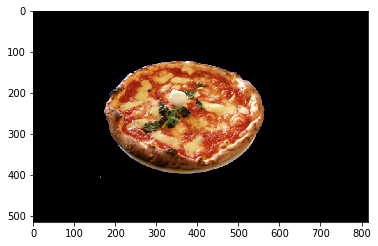

In [23]:
plt.imshow(masked_image)

# Adding a background image on top of pizza image

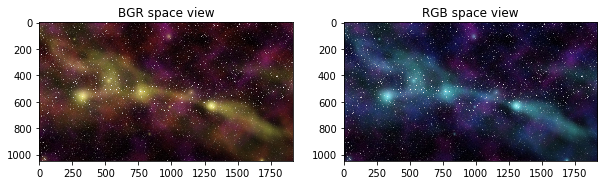

In [45]:
background_image = cv2.imread('images/space_background.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('BGR space view')
ax1.imshow(background_image)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
ax2.set_title('RGB space view')
ax2.imshow(background_image)
# now crop the image to 514 to 816 pixels same as the pizza
background_image = background_image[0:514, 0:816]

In [46]:
background_image[mask == 0] = [0, 0, 0]

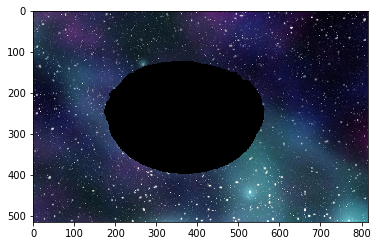

In [47]:
plt.imshow(background_image)

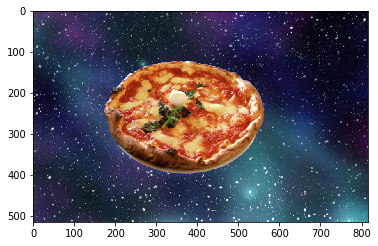

In [49]:
# finally just add these two pizza cutout and space, since 0,0,0 addition is possible
final_image = masked_image + background_image
plt.imshow(final_image)